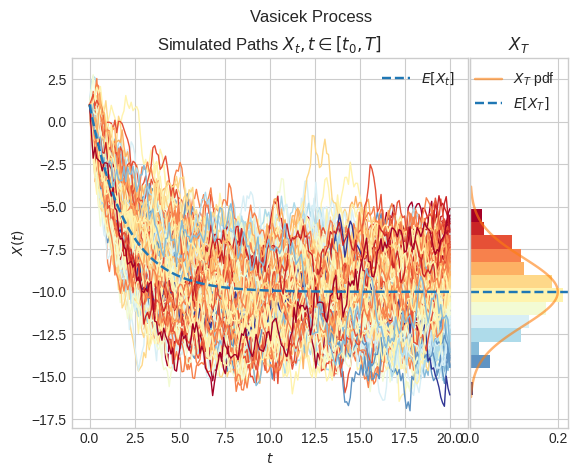

In [ ]:
%pip install aleatory
from aleatory.processes import Vasicek
process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

## Definition

The Vasicek model specifies that the instantaneous interest rate is defined by a stochastic process which can be defined by the following Stochastic Differential Equation (SDE)


\begin{equation}
dX_t = \theta (\mu - X_t) dt + \sigma dW_t, \quad t >0,
\end{equation}


with initial condition  $X_0 =x_0\in\mathbb{R}$, and where $W_t$ is a standard Brownian motion, and the three parameters are constants:

- $\theta>0$ : speed or mean reversion coefficient
- $\mu \in \mathbb{R}$ : long term mean
- $\sigma>0$ : volatility



In order to find the solution to this SDE, let us set the function $f(t,x) = x e^{\theta t}$. Then, Ito's formula implies


\begin{align*}
X_te^{\theta t} &= x_0 +\int_0^t X_s \theta e^{\theta s}ds + \int_0^t e^{\theta s}dX_s \\
& = x_0 + \int_0^t \left[ \theta X_s  e^{\theta s}  +\theta e^{\theta s}(\mu - X_s)\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \int_0^t \left[ \theta e^{\theta s}\mu\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \mu(e^{\theta t} - 1) + \int_0^t e^{\theta s}\sigma dW_s.
\end{align*}


Thus

\begin{equation}
X_t = x_0e^{-\theta t} +  \mu(1- e^{-\theta t})  + \sigma \int_0^t e^{-\theta (t-s)}dW_s.
\end{equation}

### Expectation and Variance

For each $t>0$, the conditional marginal $X_t|X_0$ from a Vacisek process satisfies

\begin{equation*}
\mathbf{E} [X_t ] = \mathbb{E}[X_t|X_0] = x_0e^{-\theta t} +  \mu(1- e^{-\theta t}),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbb{Var} [X_t |X_0] =  \frac{\sigma^2}{ 2\theta} (1- e^{-2\theta t}).
\end{equation*}

To obtain the expectation we simply use the linearity of the expectation and the fact that the Ito integral in equation (2) is a martingale. Similarly, for the variance we  use basic properties of the variance and the isometry property of the Ito integral.

### Python Implementation

So, for given $x_0, \theta>0, \mu, \sigma>0$ and $t,s>0$ You will implement the above formulas for the expectation, variance, and covariance as follows.

In [ ]:
import numpy as np

# Define Vasicek parameters
def vasicek_expectation(x0, theta, mu, t):
    """
    Calculate the expectation of Xt for a given time t.
    E[Xt] = x0 * exp(-theta * t) + mu * (1 - exp(-theta * t))
    """
    return x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def vasicek_variance(sigma, theta, t):
    """
    Calculate the variance of Xt for a given time t.
    Var[Xt] = (sigma^2 / (2 * theta)) * (1 - exp(-2 * theta * t))
    """
    return (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

def vasicek_covariance(sigma, theta, t, s):
    """
    Calculate the covariance Cov[Xt, Xs] for t > s.
    Cov[Xt, Xs] = (sigma^2 / (2 * theta)) * exp(-theta * (t - s)) * (1 - exp(-2 * theta * s))
    """
    if t >= s:
        return (sigma**2 / (2 * theta)) * np.exp(-theta * (t - s)) * (1 - np.exp(-2 * theta * s))
    else:
        raise ValueError("Time t should be greater than or equal to s.")

# Sample input values for Vasicek parameters
x0 = 1.0     # Initial interest rate
theta = 0.5   # Mean-reversion speed
mu = -10.0    # Long-term mean
sigma = 2.0   # Volatility

# Time points
t = 5.0       # Current time
s = 3.0       # Previous time

# Calculate expectation, variance, and covariance
expectation = vasicek_expectation(x0, theta, mu, t)
variance = vasicek_variance(sigma, theta, t)
covariance = vasicek_covariance(sigma, theta, t, s)

# Print results
print(f"Expectation E[Xt] at time t={t}: {expectation}")
print(f"Variance Var[Xt] at time t={t}: {variance}")
print(f"Covariance Cov[Xt, Xs] for t={t} and s={s}: {covariance}")


Expectation E[Xt] at time t=5.0: -9.097065015137114
Variance Var[Xt] at time t=5.0: 3.973048212003658
Covariance Cov[Xt, Xs] for t=5.0 and s=3.0: 1.3982552091308327


### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`.

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

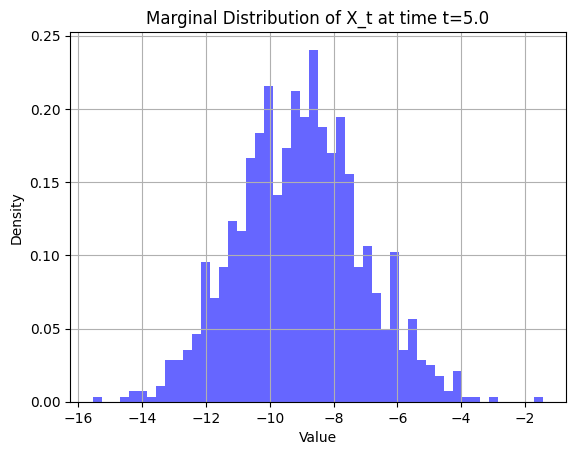

Mean of X_t: -9.097065015137114
Variance of X_t: 3.973048212003658


In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Define Vasicek parameters
x0 = 1.0     # Initial interest rate
theta = 0.5   # Mean reversion speed
mu = -10.0    # Long-term mean
sigma = 2.0   # Volatility
t = 5.0       # Current time

# Calculate the mean and variance of X_t at time t
mean_xt = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
variance_xt = (sigma**2/(2*theta)) * (1 - np.exp(-2*theta*t))
std_xt = np.sqrt(variance_xt)

# Generate sample data from a normal distribution with the calculated mean and variance
np.random.seed(42)
n_samples = 1000
samples_xt = np.random.normal(loc=mean_xt, scale=std_xt, size=n_samples)

# Plot the histogram to visualize the distribution
plt.hist(samples_xt, bins=50, density=True, alpha=0.6, color='b')
plt.title(f'Marginal Distribution of X_t at time t={t}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

print(f"Mean of X_t: {mean_xt}")
print(f"Variance of X_t: {variance_xt}")


### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \theta,  \mu, \sigma, x_0) = \dfrac{1}{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})} \sqrt{2 \pi }}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x- [x_0e^{-\theta t} +  \mu(1- e^{-\theta t})] }{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

First we consider the process
`Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)` and plot the marginal density of $X_1$.
Note that the mean is still far from the long term mean $\mu=10$. Code it and plot the Graph of Distribution
'''
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
''''

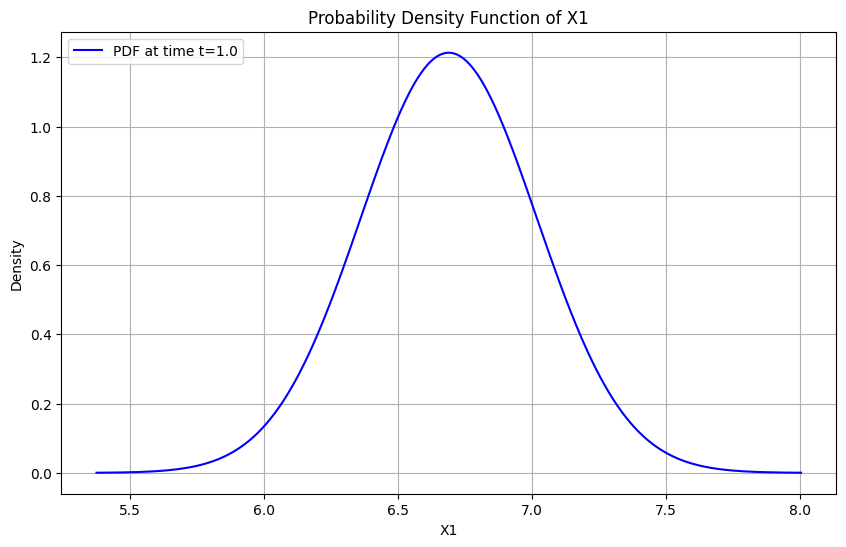

Mean of X1: 6.6890850294570185
Variance of X1: 0.10808308959542341


In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Define Vasicek parameters
x0 = 1.0     # Initial interest rate
theta = 1.0   # Speed of mean reversion
mu = 10.0     # Long-term mean
sigma = 0.5   # Volatility
t = 1.0       # Time (we focus on X_1)

# Calculate the mean and variance for X1
mean_x1 = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
variance_x1 = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
std_x1 = np.sqrt(variance_x1)

# Generate and visualize the probability density
x = np.linspace(mean_x1 - 4 * std_x1, mean_x1 + 4 * std_x1, 500)
pdf_values = norm.pdf(x, loc=mean_x1, scale=std_x1)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, color='b', label=f'PDF at time t={t}')
plt.title(f'Probability Density Function of X1')
plt.xlabel('X1')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

# Print mean and variance
print(f"Mean of X1: {mean_x1}")
print(f"Variance of X1: {variance_x1}")



**Plot Graphs** Dsitrbution in which Vary one at time ( sigma,mu,theta ,t ) . Vary one value taking  initial values of sigma,mu,theta,t

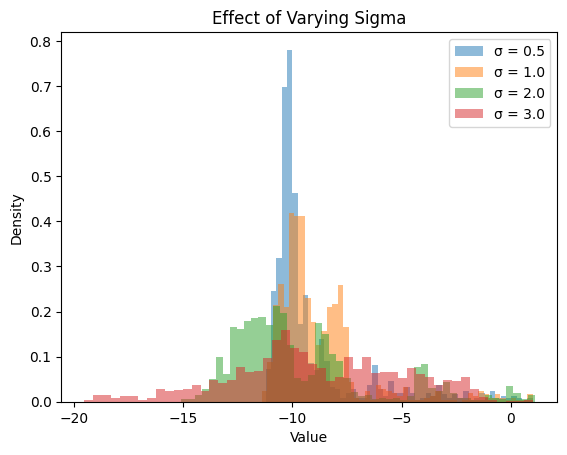

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigma_values = [0.5, 1.0, 2.0, 3.0]
for sigma in sigma_values:
    # Initialize the Vasicek process with varying sigma
    process = Vasicek(theta=0.5, mu=-10.0, sigma=sigma, initial=1.0, T=20.0)

    # Simulate the process with n paths
    samples = process.sample(n=1000)  # Removed N parameter

    # If samples is already a list of final values, use it directly
    final_values = np.array(samples)  # Ensure it's a NumPy array

    # Plot histogram for final values
    plt.hist(final_values, bins=50, density=True, alpha=0.5, label=f"σ = {sigma}")

plt.title("Effect of Varying Sigma")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()




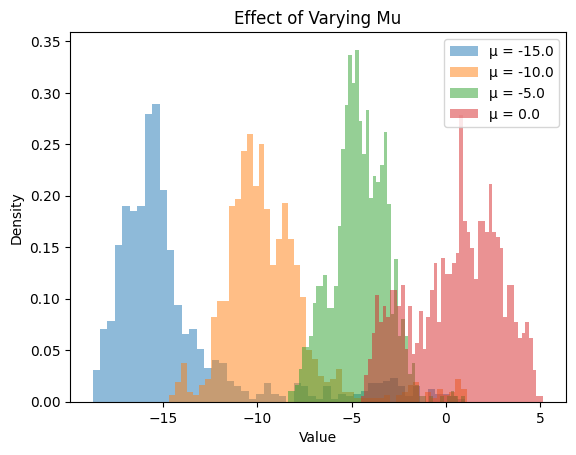

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_values = [-15.0, -10.0, -5.0, 0.0]
for mu in mu_values:
    # Initialize the Vasicek process with varying mu
    process = Vasicek(theta=0.5, mu=mu, sigma=2.0, initial=1.0, T=20.0)

    # Simulate the process with n paths
    samples = process.sample(n=1000)  # Removed N parameter

    # Convert samples to NumPy array if needed
    final_values = np.array(samples)

    # Plot histogram for final values
    plt.hist(final_values, bins=50, density=True, alpha=0.5, label=f"μ = {mu}")

# Add plot details
plt.title("Effect of Varying Mu")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


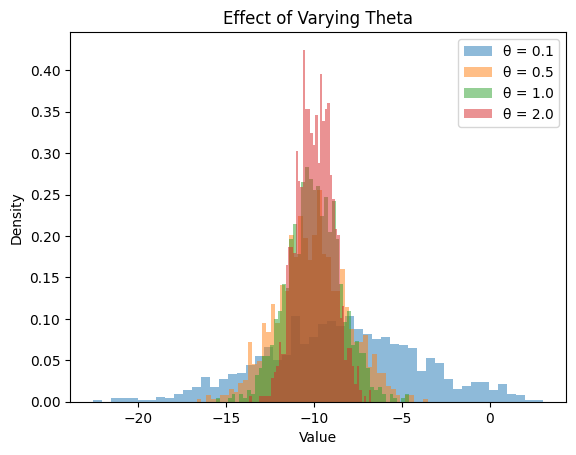

In [ ]:
import matplotlib.pyplot as plt

# Define sample parameters
theta_values = [0.1, 0.5, 1.0, 2.0]
n = 1000  # Number of sample paths
N = 200   # Number of time steps

for theta in theta_values:
    process = Vasicek(theta=theta, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)

    # Generate samples
    samples = process.sample(n=n, N=N)

    # Extract the last time step values
    final_values = samples[:, -1]

    # Plot the histogram for the final values
    plt.hist(final_values, bins=50, density=True, alpha=0.5, label=f"θ = {theta}")

plt.title("Effect of Varying Theta")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


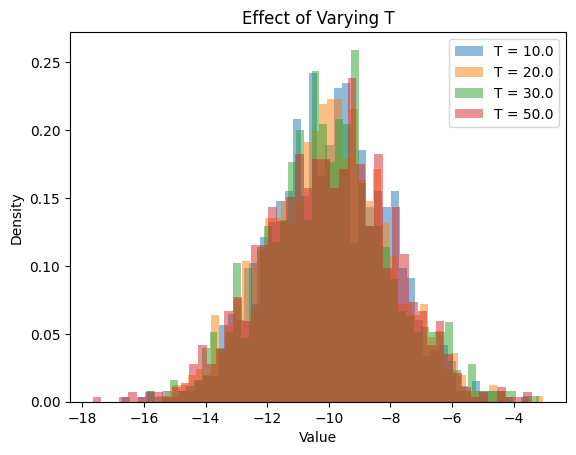

In [ ]:
T_values = [10.0, 20.0, 30.0, 50.0]
for T in T_values:
    process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=T)
    samples = process.sample(n=1000, N=200)
    final_values = samples[:, -1]
    plt.hist(final_values, bins=50, density=True, alpha=0.5, label=f"T = {T}")

plt.title("Effect of Varying T")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
#from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

AttributeError: 'Vasicek' object has no attribute 'simulate'

**Simulation**

In [ ]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

AttributeError: 'Vasicek' object has no attribute 'draw'

#### The parameter $\theta$ determines the Speed of Convergence

In [ ]:
# from aleatory.processes import Vasicek
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

AttributeError: 'Vasicek' object has no attribute 'draw'

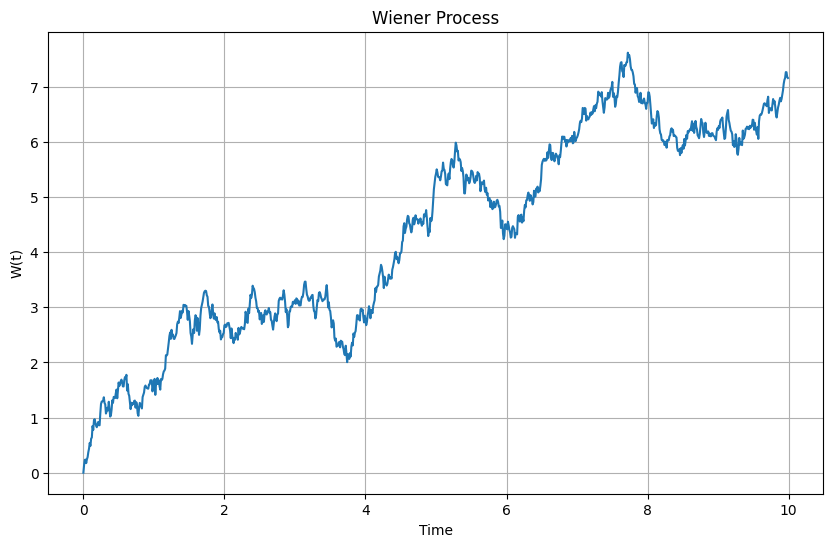

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

#Plot different no. of paths by varying parameter and time interval!